In [1]:
%pylab inline
from astropy.io import ascii, fits
from astropy import wcs
from astropy.coordinates import SkyCoord
from astropy.wcs.utils import skycoord_to_pixel
from astropy.wcs import WCS

Populating the interactive namespace from numpy and matplotlib


## CO map

In [2]:
comap = fits.open("ico.fits")
comapdata = comap[0].data[0,0]
#size (x,y) of the CO map data array
lencox, lencoy = comapdata.shape
#Filtering -- here we filter out n}ns and any value less than "thresh"
thresh = 0
mask = np.isnan(comapdata) | (comapdata<=thresh) # A Boolean (True/False) array
#Set all the above values to nan
comapdata[mask] = nan
#Get the world coordinates for the CO map
comapheader = comap[0].header
wc = wcs.WCS(comapheader, naxis=2)

## RSG

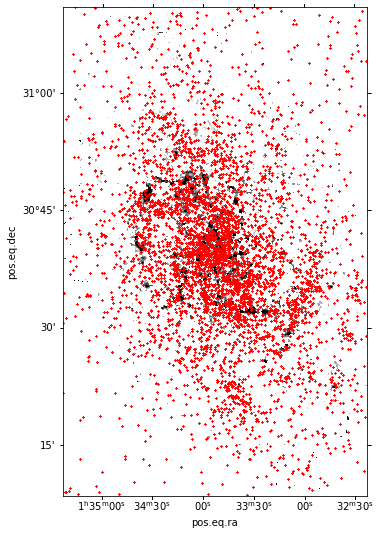

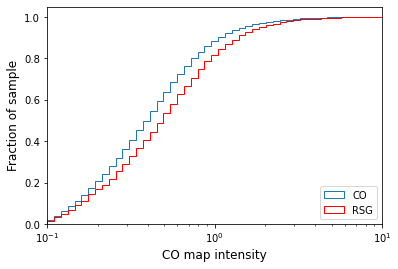

In [3]:
#Read ASCII table
rsgtab = ascii.read("rsg_m33.tsv", data_start=3)
#Get sky coordinates of RSGs
rsgcoords = SkyCoord(rsgtab["RAJ2000"], rsgtab["DEJ2000"], unit=("hourangle", "deg"))
#Convert sky coordinates to pixels using world coordinate system defined earlier
#np.asarray converts the list into a numpy array with data-type "int". Numpy arrays
#are much easier to manipulate than Python lists
rsgpix = np.asarray(skycoord_to_pixel(rsgcoords, wc), dtype=int)
#Only keep RSG pixels that fall inside the CO map area
#This line below uses the list comprehension trickery of Python! Its the equivalent of writing
rsgpix_insideco = np.array([[i,j] for i,j in rsgpix.T if ((0<=j<lencox) and (0<=i<lencoy))]).T

#Show the RSGs on the CO map
plt.figure(figsize=(9,9))
plt.subplot(projection=wc)
plt.imshow(comapdata, vmin=0, vmax=2, cmap="gist_gray_r")
plt.scatter(rsgpix_insideco[0], rsgpix_insideco[1], marker="x", s=2, color="r")
plt.show()

#Get CO intensity values for the RSG pixels
rsgco = comapdata[rsgpix_insideco[1], rsgpix_insideco[0]]

#Plot 
plt.figure()
plt.hist(comapdata.flatten(), histtype="step", density=True, cumulative=True, bins=np.logspace(-1, 1, 50),
        label="CO")
plt.hist(rsgco, histtype="step", color="r", density=True, cumulative=True, bins=np.logspace(-1, 1, 50),
        label="RSG")
plt.xlabel("CO map intensity", fontsize=12)
plt.ylabel("Fraction of sample", fontsize=12)
plt.xscale("log")
plt.xlim(0.1, 10)
plt.legend(loc=4)
plt.show()

### WRs

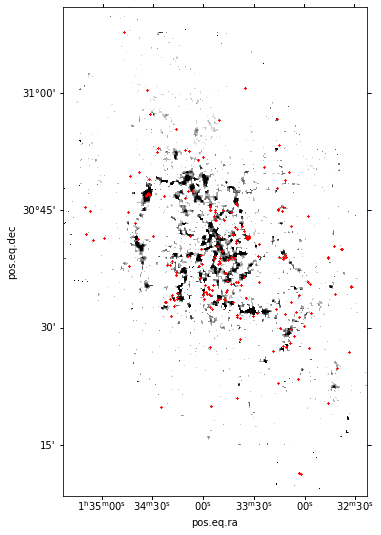

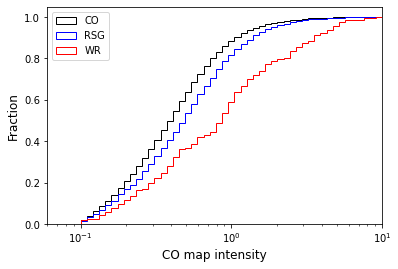

In [4]:
wrtab = ascii.read("wr_m33.tsv", data_start=3)
wrcoords = SkyCoord(wrtab["_RA"], wrtab["_DE"], unit="deg")
wrpix = np.asarray(skycoord_to_pixel(wrcoords, wc), dtype=int)
wrpix_insideco = np.array([[i,j] for i,j in wrpix.T if ((0<=j<lencox) and (0<=i<lencoy))]).T

plt.figure(figsize=(9,9))
plt.subplot(projection=wc)
plt.imshow(comapdata, vmin=0, vmax=2, cmap="gist_gray_r")
#Check if skycoords are correct
#plt.scatter(rsgcoords.ra.deg, rsgcoords.dec.deg, marker="x", s=2, color="r", transform=plt.gca().get_transform("icrs"))
#Check if pixels are correct
plt.scatter(wrpix_insideco[0], wrpix_insideco[1], marker="x", s=2, color="r")
plt.show()

wrco = comapdata[wrpix_insideco[1], wrpix_insideco[0]]
plt.figure()
plt.hist(comapdata.flatten(), histtype="step", color="k", \
         density=True, cumulative=True, bins=np.logspace(-1, 1, 50), label="CO")
plt.hist(rsgco, histtype="step", color="b", \
         density=True, cumulative=True, bins=np.logspace(-1, 1, 50), label="RSG")
plt.hist(wrco, histtype="step", color="r", \
         density=True, cumulative=True, bins=np.logspace(-1, 1, 50), label="WR")
plt.xlabel("CO map intensity", fontsize=12)
plt.ylabel("Fraction", fontsize=12)
plt.xscale("log")
plt.xlim(0.06, 10)
plt.legend(loc=2)
plt.show()

## NCR

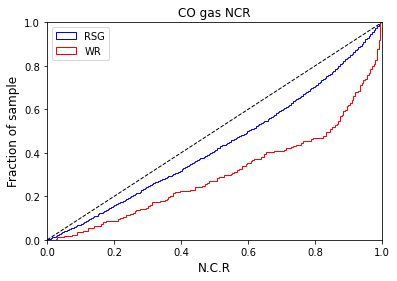

In [44]:
def get_ncr(data, vals):
    """
    Iterates over "vals" and return 
    NCR value or the index/array-size, 
    as Ness had mentioned.
    """
    #This again uses list comprehension
    #This iterates
    return np.array([np.where(data>=x)[0][0]/len(data) for x in vals if not np.isnan(x)])

#Sorted CO map data
comapdata_sorted = np.sort(comapdata.flatten())
#Exclude nans
comapdata_sorted_nonan = comapdata_sorted[~np.isnan(comapdata_sorted)]
#Get NCR of RSGs
ncr_rsgco = get_ncr(comapdata_sorted_nonan, rsgco)
#Get NCR of WRs
ncr_wrco = get_ncr(comapdata_sorted_nonan, wrco)

plt.figure()
plt.hist(ncr_rsgco, histtype="step", color="b", \
         density=True, cumulative=True, bins=np.linspace(0,1,200), label="RSG")
plt.hist(ncr_wrco, histtype="step", color="r", \
         density=True, cumulative=True, bins=np.linspace(0,1,200), label="WR")
plt.ylabel("Fraction of sample", fontsize=12)
plt.plot(np.linspace(0,1,200), np.linspace(0,1,200), "k--", lw=1.0)
plt.title('CO gas NCR')
plt.xlabel("N.C.R", fontsize=12)
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(loc=2)
plt.show()

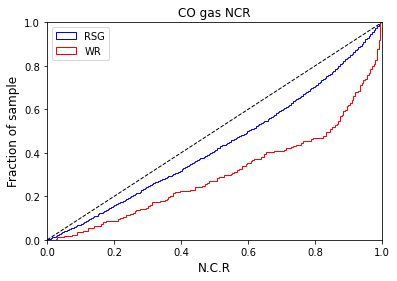

0.0005663051026395968 0.029145494286980878


In [42]:
plt.figure()
plt.hist(b, histtype="step", color="b", \
         density=True, cumulative=True, bins=np.linspace(0,1,200), label="RSG")
plt.hist(c, histtype="step", color="r", \
         density=True, cumulative=True, bins=np.linspace(0,1,200), label="WR")
plt.ylabel("Fraction of sample", fontsize=12)
plt.plot(np.linspace(0,1,200), np.linspace(0,1,200), "k--", lw=1.0)
plt.title('CO gas NCR')
plt.xlabel("N.C.R", fontsize=12)
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(loc=2)
plt.show()

## Atomic Gas

In [6]:
atomicmap = fits.open("atomic.fits")
atomicmapdata = atomicmap[0].data
#size (x,y) of the atomic map data array
lenatomicx, lenatomicy = atomicmapdata.shape
#Filtering -- here we filter out nans and any value less than "thresh"
thresh = 0
mask = np.isnan(atomicmapdata) | (atomicmapdata<=thresh) # A Boolean (True/False) array
#Set all the above values to nan
atomicmapdata[mask] = nan
#Get the world coordinates for the CO map
atomicmapheader = atomicmap[0].header
wc2 = wcs.WCS(atomicmapheader, naxis=2)

Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


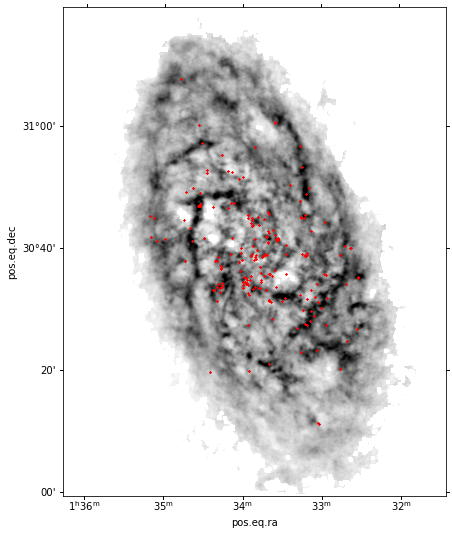

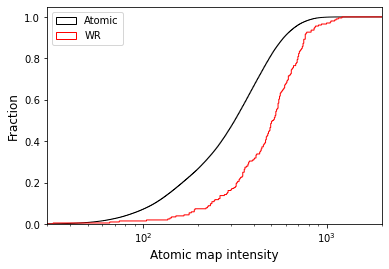

In [7]:
wrtab = ascii.read("wr_m33.tsv", data_start=3)
wrcoords = SkyCoord(wrtab["_RA"], wrtab["_DE"], unit="deg")
wrpix = np.asarray(skycoord_to_pixel(wrcoords, wc2), dtype=int)
wrpix_insideatomic = np.array([[i,j] for i,j in wrpix.T if ((0<=j<lenatomicx) and (0<=i<lenatomicy))]).T

plt.figure(figsize=(9,9))
plt.subplot(projection=wc2)
plt.imshow(atomicmapdata, vmin=20, vmax=900, cmap="gist_gray_r")
plt.scatter(wrpix_insideatomic[0], wrpix_insideatomic[1], marker="x", s=2, color="r")
plt.show()

wratomic = atomicmapdata[wrpix_insideatomic[1], wrpix_insideatomic[0]]

plt.figure()
plt.hist(atomicmapdata.flatten(), histtype="step", color="k", \
         density=True, cumulative=True, bins=np.logspace(0, 4, 1000), label="Atomic")
plt.hist(wratomic, histtype="step", color="r", \
         density=True, cumulative=True, bins=np.logspace(0, 4, 1000), label="WR")
plt.xlabel("Atomic map intensity", fontsize=12)
plt.ylabel("Fraction", fontsize=12)
plt.xscale("log")
plt.xlim(30, 2000)
plt.legend(loc=2)
plt.show()

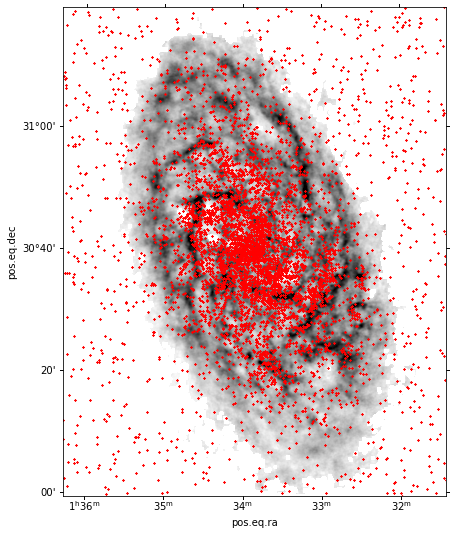

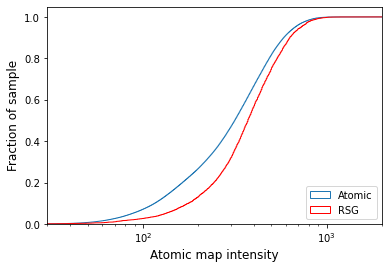

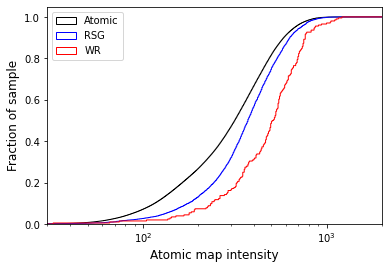

In [8]:
rsgpix = np.asarray(skycoord_to_pixel(rsgcoords, wc2), dtype=int)
#Only keep RSG pixels that fall inside the CO map area
#This line below uses the list comprehension trickery of Python! Its the equivalent of writing
rsgpix_insideatomic = np.array([[i,j] for i,j in rsgpix.T if ((0<=j<lenatomicx) and (0<=i<lenatomicy))]).T


#Show the RSGs on the atomic map
plt.figure(figsize=(9,9))
plt.subplot(projection=wc2)
plt.imshow(atomicmapdata, vmin=20, vmax=900, cmap="gist_gray_r")
plt.scatter(rsgpix_insideatomic[0], rsgpix_insideatomic[1], marker="x", s=2, color="r")
plt.show()


#Get atomic intensity values for the RSG pixels
rsgatomic = atomicmapdata[rsgpix_insideatomic[1], rsgpix_insideatomic[0]]

#Plot 
plt.figure()
plt.hist(atomicmapdata.flatten(), histtype="step", density=True, cumulative=True, bins=np.logspace(0, 4, 1000),
        label="Atomic")
plt.hist(rsgatomic, histtype="step", color="r", density=True, cumulative=True, bins=np.logspace(0, 4, 1000),
        label="RSG")
plt.xlabel("Atomic map intensity", fontsize=12)
plt.ylabel("Fraction of sample", fontsize=12)
plt.xscale("log")
plt.xlim(30, 2000)
plt.legend(loc=4)
plt.show()

#All Stars
plt.figure()
plt.hist(atomicmapdata.flatten(), histtype="step", color="black", density=True, cumulative=True, bins=np.logspace(0, 4, 1000),
        label="Atomic")
plt.hist(rsgatomic, histtype="step", color="blue", density=True, cumulative=True, bins=np.logspace(0, 4, 1000),
        label="RSG")
plt.hist(wratomic, histtype="step", color="red", density=True, cumulative=True, bins=np.logspace(0, 4, 1000), label="WR")
plt.xlabel("Atomic map intensity", fontsize=12)
plt.ylabel("Fraction of sample", fontsize=12)
plt.xscale("log")
plt.xlim(30, 2000)
plt.legend(loc=2)
plt.show()

## Atomic NCR

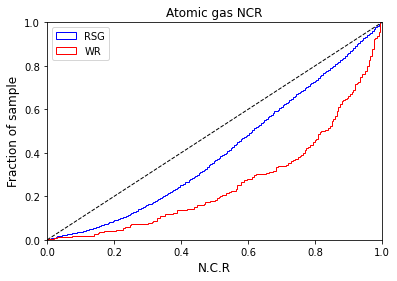

In [9]:
#Sorted atomic map data
atomicmapdata_sorted = np.sort(atomicmapdata.flatten())
#Exclude nans
atomicmapdata_sorted_nonan = atomicmapdata_sorted[~np.isnan(atomicmapdata_sorted)]
#Get NCR of RSGs
ncr_rsgatomic = get_ncr(atomicmapdata_sorted_nonan, rsgatomic)
#Get NCR of WRs
ncr_wratomic = get_ncr(atomicmapdata_sorted_nonan, wratomic)

plt.figure()
plt.hist(ncr_rsgatomic, histtype="step", color="b", \
         density=True, cumulative=True, bins=np.linspace(0,1,200), label="RSG")
plt.hist(ncr_wratomic, histtype="step", color="r", \
         density=True, cumulative=True, bins=np.linspace(0,1,200), label="WR")
plt.ylabel("Fraction of sample", fontsize=12)
plt.plot(np.linspace(0,1,200), np.linspace(0,1,200), "k--", lw=1.0)
plt.title('Atomic gas NCR')
plt.xlabel("N.C.R", fontsize=12)
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(loc=2)
plt.show()

Text(0.5, 1.0, 'Atomic Map')

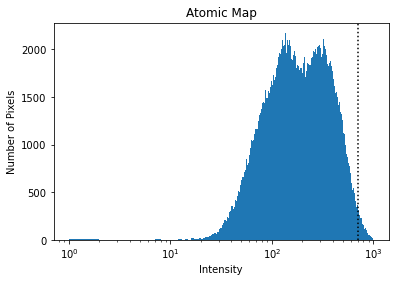

In [10]:
plt.hist(atomicmapdata.flatten(),bins=range(0,1000,1))
plt.axvline(700, ls='dotted',color='black',zorder=2)
plt.xscale('log')
plt.xlabel('Intensity')
plt.ylabel('Number of Pixels')
plt.title('Atomic Map')


Text(0.5, 1.0, 'CO Map')

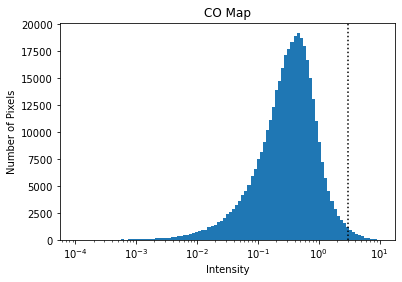

In [11]:
plt.hist(comapdata.flatten(),bins=np.logspace(-4,1,100))
plt.axvline(3, ls='dotted',color='black',zorder=2)
plt.xscale('log')
plt.xlabel('Intensity')
plt.ylabel('Number of Pixels')
plt.title('CO Map')

## Brightest Pixels

<ipython-input-12-4fdcdc15ca8a>:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  atomic_arr[mask_list] = float('nan')


[ 600.00181024  600.00212047  600.00283049 ... 1245.86138607 1247.32097063
 1250.31864052] 86764


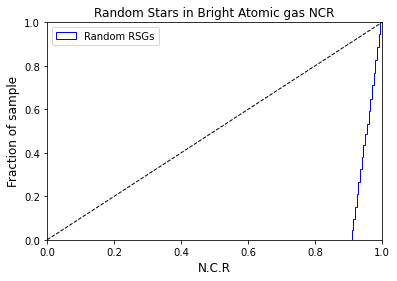

In [12]:
atomicmapdata_sorted = np.sort(atomicmapdata.flatten())
#Exclude nans
atomicmapdata_sorted_nonan = atomicmapdata_sorted[~np.isnan(atomicmapdata_sorted)]

# Excluding pixels below this value
atomic_arr = atomicmapdata.flatten().copy()
mask_list = [atomic_arr < 600] 
atomic_arr[mask_list] = float('nan')
atomic_arr_unsort = atomic_arr[~np.isnan(atomic_arr)]
atomic_arr_sorted = np.sort(atomic_arr_unsort)
print(atomic_arr_sorted, len(atomic_arr_sorted))

#Getting random star pixel values in the atomic gas
randomstars_bright = np.random.choice(atomic_arr_sorted, 5000)
#Getting NCR
ncr_randomstars_bright = get_ncr(atomicmapdata_sorted_nonan, randomstars_bright)

plt.figure()
plt.hist(ncr_randomstars_bright, histtype="step", color="b", \
         density=True, cumulative=True, bins=np.linspace(0,1,200), label="Random RSGs")
plt.ylabel("Fraction of sample", fontsize=12)
plt.plot(np.linspace(0,1,200), np.linspace(0,1,200), "k--", lw=1.0)
plt.title('Random Stars in Bright Atomic gas NCR')
plt.xlabel("N.C.R", fontsize=12)
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(loc=2)
plt.show()


<ipython-input-13-f11f75fdb5eb>:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  atomic_arr[mask_list] = float('nan')


[1.08726900e-02 1.54402490e-01 2.16437474e-01 ... 9.99986658e+01
 9.99995274e+01 9.99999885e+01] 68516


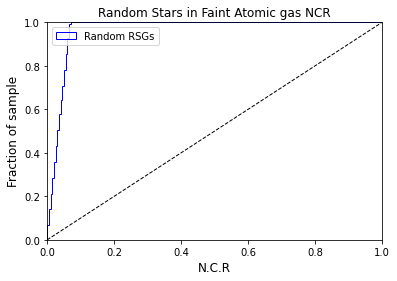

In [13]:
atomicmapdata_sorted = np.sort(atomicmapdata.flatten())
#Exclude nans
atomicmapdata_sorted_nonan = atomicmapdata_sorted[~np.isnan(atomicmapdata_sorted)]

# Excluding pixels below this value
atomic_arr = atomicmapdata.flatten().copy()
mask_list = [atomic_arr > 100] 
atomic_arr[mask_list] = float('nan')
atomic_arr_unsort = atomic_arr[~np.isnan(atomic_arr)]
atomic_arr_sorted = np.sort(atomic_arr_unsort)
print(atomic_arr_sorted, len(atomic_arr_sorted))

#Getting random star pixel values in the atomic gas
randomstars_faint = np.random.choice(atomic_arr_sorted, 5000)
#Getting NCR
ncr_randomstars_faint = get_ncr(atomicmapdata_sorted_nonan, randomstars_faint)

plt.figure()
plt.hist(ncr_randomstars_faint, histtype="step", color="b", \
         density=True, cumulative=True, bins=np.linspace(0,1,200), label="Random RSGs")
plt.ylabel("Fraction of sample", fontsize=12)
plt.plot(np.linspace(0,1,200), np.linspace(0,1,200), "k--", lw=1.0)
plt.title('Random Stars in Faint Atomic gas NCR')
plt.xlabel("N.C.R", fontsize=12)
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(loc=2)
plt.show()

<ipython-input-14-27851bfbeb6a>:9: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  atomic_arr[mask_list] = float('nan')
<ipython-input-14-27851bfbeb6a>:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  atomic_arr[mask_list2] = float('nan')


[200.00089979 200.00108282 200.00149663 ... 599.99582601 599.99694426
 599.99788189] 621146


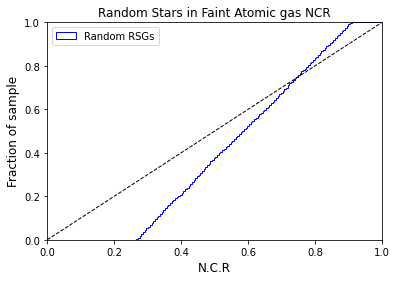

In [14]:
atomicmapdata_sorted = np.sort(atomicmapdata.flatten())
#Exclude nans
atomicmapdata_sorted_nonan = atomicmapdata_sorted[~np.isnan(atomicmapdata_sorted)]

# Excluding pixels below this value
atomic_arr = atomicmapdata.flatten().copy()
mask_list = [atomic_arr < 200] 
mask_list2 = [atomic_arr > 600]
atomic_arr[mask_list] = float('nan')
atomic_arr[mask_list2] = float('nan')
atomic_arr_unsort = atomic_arr[~np.isnan(atomic_arr)]
atomic_arr_sorted = np.sort(atomic_arr_unsort)
print(atomic_arr_sorted, len(atomic_arr_sorted))

#Getting random star pixel values in the atomic gas
randomstars_faint = np.random.choice(atomic_arr_sorted, 5000)
#Getting NCR
ncr_randomstars_faint = get_ncr(atomicmapdata_sorted_nonan, randomstars_faint)

plt.figure()
plt.hist(ncr_randomstars_faint, histtype="step", color="b", \
         density=True, cumulative=True, bins=np.linspace(0,1,200), label="Random RSGs")
plt.ylabel("Fraction of sample", fontsize=12)
plt.plot(np.linspace(0,1,200), np.linspace(0,1,200), "k--", lw=1.0)
plt.title('Random Stars in Faint Atomic gas NCR')
plt.xlabel("N.C.R", fontsize=12)
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(loc=2)
plt.show()

## Choosing Random Pixels

In [15]:
comapdata.shape

(1251, 777)

In [16]:
#Getting our random xy pixels 
random_rsgpixx = np.random.choice(777,5045)
random_rsgpixy = np.random.choice(1251, 5045)

random_rsgpix = np.stack((random_rsgpixx, random_rsgpixy))
print(random_rsgpix)

[[ 590  108  280 ...  720  242  152]
 [ 149   83 1037 ... 1222  573  343]]


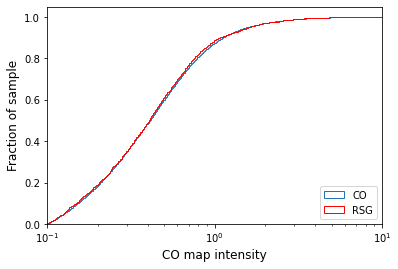

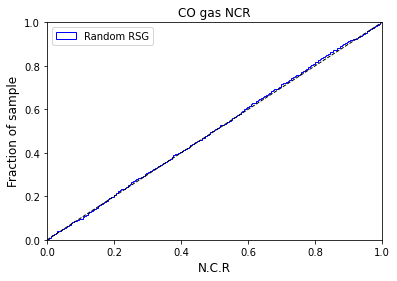

In [17]:
random_rsgpix_insideco = np.array([[i,j] for i,j in random_rsgpix.T if ((0<=j<lencox) and (0<=i<lencoy))]).T

random_rsgco = comapdata[random_rsgpix_insideco[1], random_rsgpix_insideco[0]]

#Plot 
plt.figure()
plt.hist(comapdata.flatten(), histtype="step", density=True, cumulative=True, bins=np.logspace(-1, 1, 500),
        label="CO")
plt.hist(random_rsgco, histtype="step", color="r", density=True, cumulative=True, bins=np.logspace(-1, 1, 500),
        label="RSG")
plt.xlabel("CO map intensity", fontsize=12)
plt.ylabel("Fraction of sample", fontsize=12)
plt.xscale("log")
plt.xlim(0.1, 10)
plt.legend(loc=4)
plt.show()

#Get NCR of random RSGs
ncr_random_rsgco = get_ncr(comapdata_sorted_nonan, random_rsgco)

plt.figure()
plt.hist(ncr_random_rsgco, histtype="step", color="b", \
         density=True, cumulative=True, bins=np.linspace(0,1,200), label="Random RSG")
plt.ylabel("Fraction of sample", fontsize=12)
plt.plot(np.linspace(0,1,200), np.linspace(0,1,200), "k--", lw=1.0)
plt.title('CO gas NCR')
plt.xlabel("N.C.R", fontsize=12)
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(loc=2)
plt.show()

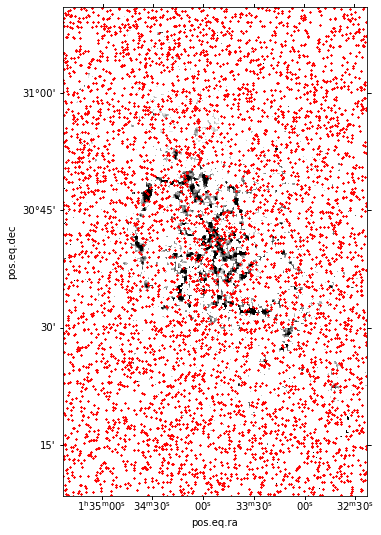

In [18]:
#Show the RSGs on the CO map
plt.figure(figsize=(9,9))
plt.subplot(projection=wc)
plt.imshow(comapdata, vmin=0, vmax=2, cmap="gist_gray_r")
plt.scatter(random_rsgpix_insideco[0], random_rsgpix_insideco[1], marker="x", s=2, color="r")
plt.show()

In [19]:
atomicmapdata.shape

(1604, 1256)

In [20]:
#Getting our random xy pixels 
random_atomic_rsgpixx = np.random.choice(1256,206)
random_atomic_rsgpixy = np.random.choice(1604, 206)

random_atomic_rsgpix = np.stack((random_atomic_rsgpixx, random_atomic_rsgpixy))
print(random_atomic_rsgpix)

[[1081  820  231  280  818  197  571  394  229  218  821  300 1175  347
   861 1087  476  149 1061  377 1076  350 1240  860  853  257  990 1000
  1080  495 1095  273  865    1   70  628 1008  919  442  673  840  163
   188  160  903  154  858  193  435   72 1196  101 1035  558  863 1114
   864  231  875  549 1162  131 1065  975  233  606  317  406  460  438
   858  670 1193  173 1214  283 1243  338  711  545  875  223 1095  229
   566  268  102  361  920  204  906    2  492   39  719  431  515  182
   255  640  922 1037  322 1232  356  980  423  651  413  447  883  833
   715  708  451  148  576   80  939   78  927  626  680 1178 1147  511
   254  335  933  680  350  785  504  541  854  546 1076 1116  828  727
   266  139  885  691  507  443   49   27 1250  660 1099 1235  579  861
   834 1213  277 1183   55  455 1124  127 1048  928  660  182  649  387
   210  932  197  959  758 1089 1168  614 1163  466 1099  657 1065  548
   796  193 1224  473    6 1125  548   88  346  575  774  292  3

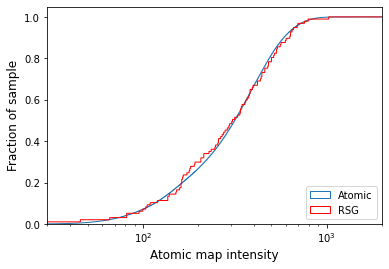

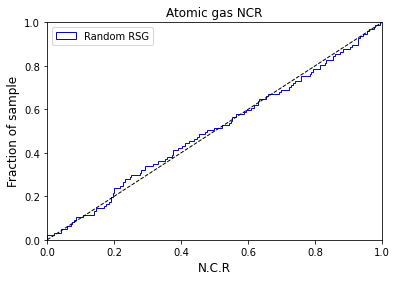

In [21]:
random_rsgpix_insideatomic = np.array([[i,j] for i,j in random_atomic_rsgpix.T if ((0<=j<lenatomicx) and (0<=i<lenatomicy))]).T

random_rsgatomic = atomicmapdata[random_rsgpix_insideatomic[1], random_rsgpix_insideatomic[0]]

#Plot 
plt.figure()
plt.hist(atomicmapdata.flatten(), histtype="step", density=True, cumulative=True, bins=np.logspace(0, 4, 1000),
        label="Atomic")
plt.hist(random_rsgatomic, histtype="step", color="r", density=True, cumulative=True, bins=np.logspace(0, 4, 1000),
        label="RSG")
plt.xlabel("Atomic map intensity", fontsize=12)
plt.ylabel("Fraction of sample", fontsize=12)
plt.xscale("log")
plt.xlim(30, 2000)
plt.legend(loc=4)
plt.show()

#Get NCR of random RSGs
ncr_random_rsgatomic = get_ncr(atomicmapdata_sorted_nonan, random_rsgatomic)

plt.figure()
plt.hist(ncr_random_rsgatomic, histtype="step", color="b", \
         density=True, cumulative=True, bins=np.linspace(0,1,200), label="Random RSG")
plt.ylabel("Fraction of sample", fontsize=12)
plt.plot(np.linspace(0,1,200), np.linspace(0,1,200), "k--", lw=1.0)
plt.title('Atomic gas NCR')
plt.xlabel("N.C.R", fontsize=12)
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(loc=2)
plt.show()